#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.5em; color:#00b3e5;"> ANN Classification --- Risk

In [1]:
import numpy                 as   np
from   numpy               import expand_dims

import pandas                as   pd
pd.set_option('display.float_format', lambda x: '%.2f' %  x)

import matplotlib.pyplot     as   plt
import seaborn               as   sns

from random                import randint
from sklearn.utils         import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
Project_Name = 'Risk'

In [3]:
# making training data

In [4]:
dataset = pd.read_csv('Risk.csv',delimiter=',',header=0)
dataset.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [5]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.dropna(inplace=True)
dataset.index = range( dataset.shape[0] )
dataset.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad


In [6]:
dataset.shape

(522, 10)

In [7]:
# distribution
dataset['Risk'].value_counts(normalize=True)  

Risk
good   0.56
bad    0.44
Name: proportion, dtype: float64

In [8]:
dataset['Risk'] = dataset['Risk'].replace('good',0).replace('bad',1)
dataset.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,1
1,45,male,2,free,little,little,7882,42,furniture/equipment,0
2,53,male,2,free,little,little,4870,24,car,1


In [9]:
# one-hot-encoding
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist()
cat_data = dataset[cat_cols]

In [10]:
cat_df = pd.get_dummies(cat_data).astype(int)
cat_df.head(3)

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [11]:
sc_df = dataset.drop(cat_cols,axis=1)
sc_df.head(3)

,Age,Job,Credit amount,Duration,Risk
0,22,2,5951,48,1
1,45,2,7882,42,0
2,53,2,4870,24,1


In [12]:
dataset = pd.concat([cat_df,sc_df],axis=1)
dataset.tail(3)

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration,Risk
519,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,40,3,3857,30,0
520,0,1,1,0,0,1,0,0,0,1,...,0,0,1,0,0,23,2,1845,45,1
521,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,27,2,4576,45,0


In [13]:
X_Train = dataset.iloc[:450,:-1]; y_Train=dataset.iloc[:450,-1]; X_Train.index=range(X_Train.shape[0])
X_Test  = dataset.iloc[450:,:-1]; y_Test =dataset.iloc[450:,-1]; X_Test.index =range(X_Test.shape[0])
X_Test.tail(3)

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
69,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,40,3,3857,30
70,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,23,2,1845,45
71,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,27,2,4576,45


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit( X_Train )

MinMaxScaler()

In [15]:
x_train_scaled = scaler.transform( X_Train )    # X_Train = scaler.inverse_transform( x_train_scaled )
x_test_scaled  = scaler.transform( X_Test  )    # X_Test  = scaler.inverse_transform( x_test_scaled  )

print( x_train_scaled.shape, '\n' )
print( x_train_scaled[:1] )

(450, 24) 

[[1.         0.         0.         1.         0.         1.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.05357143 0.66666667 0.3621801  0.63636364]]


In [16]:
y_train = expand_dims( y_Train, axis=1 )
y_test  = expand_dims( y_Test,  axis=1 )

print( y_train.shape, '\n' )
print( y_train[:3] )

(450, 1) 

[[1]
 [0]
 [1]]


In [17]:
# creating an artificial neural network

In [18]:
import tensorflow         as   tf
from   tensorflow       import keras
from   keras.models     import Sequential
from   keras.layers     import Dense, Dropout, Activation
from   keras.metrics    import categorical_crossentropy
from   keras.optimizers import Adam

In [19]:
model = Sequential()

model.add( Dense(units=16, input_shape=(x_train_scaled.shape[1],) ))
model.add( Dropout(0.2) )
model.add( Activation('relu') )
          
model.add( Dense(units=16) )
#model.add( Dropout(0.2) )
model.add( Activation('relu') )
model.add( Dense(units=10) )
#model.add( Dropout(0.2) )
model.add( Activation('relu') )

model.add( Dense(units=1) )         # units = number of classes
model.add( Activation('sigmoid') ) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [20]:
# training the model

# **Optimizers:**
   - **'sgd' 'adam' 'adamax' 'nadam'** 
   - **Adam( learning_rate=0.001 )**
   
# **Loss:**
   - **'sparse_categorical_crossentropy'**
   - **'binary_crossentropy'**
   - **'mae' 'hinge' 'huber' 'bce' 'mse'**
   
# **Metrics:**
   - **[ 'accuracy', 'mse', 'mae' ]**

In [131]:
model.compile(
    optimizer =    Adam( learning_rate=0.0015 ),
    loss      =   'mae',
    metrics   = [ 'accuracy' ]
             )

In [132]:
model.fit( x                =   x_train_scaled, 
           y                =   y_train,        
           epochs           =   10,
           batch_size       =   50,
          
           validation_split =   0.2,
          #validation_data  = ( scaled_valid_samples, valid_labels ),
          
           shuffle          =   True,
           verbose          =   2
         )

Epoch 1/10
8/8 - 1s - loss: 0.0905 - accuracy: 0.9250 - val_loss: 0.3221 - val_accuracy: 0.6778 - 758ms/epoch - 95ms/step
Epoch 2/10
8/8 - 0s - loss: 0.1049 - accuracy: 0.8972 - val_loss: 0.3235 - val_accuracy: 0.6778 - 57ms/epoch - 7ms/step
Epoch 3/10
8/8 - 0s - loss: 0.0966 - accuracy: 0.9139 - val_loss: 0.3307 - val_accuracy: 0.6778 - 52ms/epoch - 6ms/step
Epoch 4/10
8/8 - 0s - loss: 0.0869 - accuracy: 0.9167 - val_loss: 0.3273 - val_accuracy: 0.6778 - 53ms/epoch - 7ms/step
Epoch 5/10
8/8 - 0s - loss: 0.0870 - accuracy: 0.9222 - val_loss: 0.3361 - val_accuracy: 0.6667 - 54ms/epoch - 7ms/step
Epoch 6/10
8/8 - 0s - loss: 0.0834 - accuracy: 0.9306 - val_loss: 0.3318 - val_accuracy: 0.6778 - 60ms/epoch - 7ms/step
Epoch 7/10
8/8 - 0s - loss: 0.0969 - accuracy: 0.9139 - val_loss: 0.3338 - val_accuracy: 0.6444 - 52ms/epoch - 6ms/step
Epoch 8/10
8/8 - 0s - loss: 0.0849 - accuracy: 0.9250 - val_loss: 0.3347 - val_accuracy: 0.6778 - 54ms/epoch - 7ms/step
Epoch 9/10
8/8 - 0s - loss: 0.0987 - a

In [133]:
# plotting loss & metrics

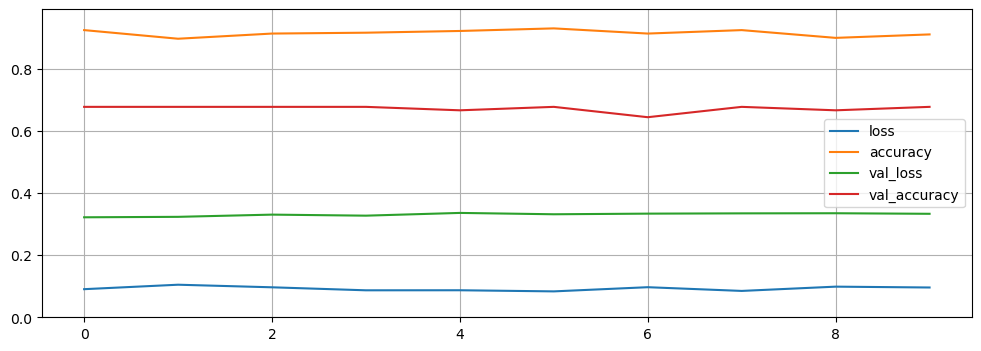

In [134]:
losses = pd.DataFrame( model.history.history )
losses.plot(figsize=(12,4)).grid(True)
plt.gca().set_ylim(0,.9921); plt.show()

##### 

In [135]:
# save weights

#import time; version=time.strftime('%Y_%m_%d_%H_%M_%S'); print(version)
version = '02'

model.save_weights( Project_Name + '_' + version
                  , overwrite   = True 
                  , save_format = None 
                  , options     = None 
                  )

##### 

In [136]:
# load weights
version = '02'
 
model.load_weights( Project_Name + '_' + version 
                  , by_name       = False 
                  , skip_mismatch = False 
                  , options       = None 
                  )

##### 

In [137]:
# making test data and predicting

In [138]:
prediction         = model.predict(x_test_scaled) 
rounded_prediction = np.round(prediction)

3/3 [==============================] - 0s 3ms/step


In [139]:
# confusion matrix

In [140]:
from   sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

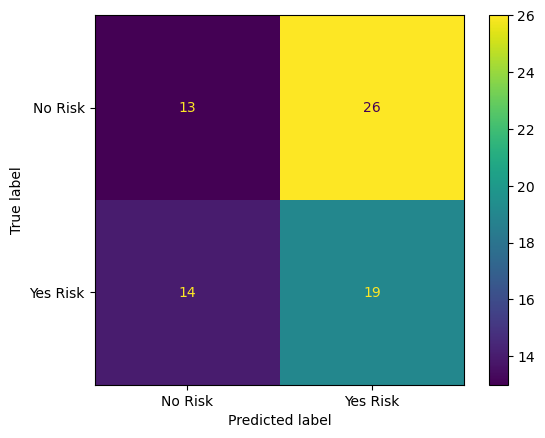

In [141]:
cm = confusion_matrix(
    y_true = y_test,
    y_pred = rounded_prediction
    )

ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels   = ['No Risk','Yes Risk']
).plot()
plt.show()

#####   

#####   

#####   

#####   